In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as datasets
import torchvision.transforms as transforms

# デバイスの設定
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ハイパーパラメータの設定
input_size = 784  # 28x28ピクセルの画像
hidden_size = 64
num_classes = 10
num_epochs = 10
batch_size = 100
learning_rate = 0.001

# MNISTデータセットの読み込みと前処理
train_dataset = datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

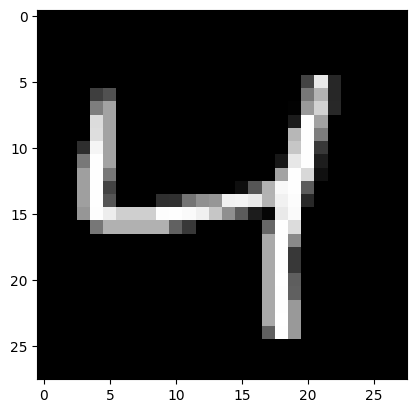

In [6]:
import matplotlib.pyplot as plt
plt.imshow(train_dataset.data[2].numpy(), cmap='gray')

In [8]:
# ニューラルネットワークモデルの定義
model = nn.Sequential(
    nn.Linear(input_size, hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, num_classes)
).to(device)


In [9]:
model.load_state_dict(torch.load('model.ckpt', map_location=device))

<All keys matched successfully>

In [27]:
model.eval()

Sequential(
  (0): Linear(in_features=784, out_features=64, bias=True)
  (1): ReLU()
  (2): Linear(in_features=64, out_features=10, bias=True)
)

In [30]:
test_data = test_dataset[0]
test_data_input = test_data[0].reshape(-1, input_size).to(device)
test_data_label = test_data[1]

In [33]:
output = model(test_data_input)

In [47]:
output_prob = torch.nn.functional.softmax(output, dim=1)

In [46]:
output_prob.argmax()

tensor(7)

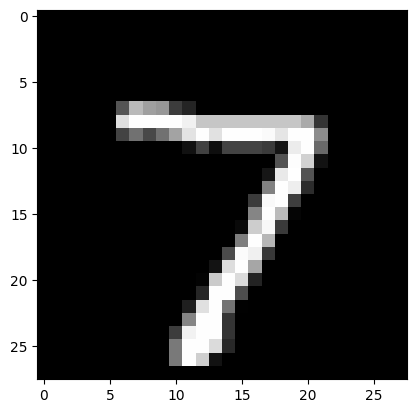

In [50]:
plt.imshow(test_data[0][0].numpy(), cmap='gray')